fsb_state: [1, 0, 1, 0, 0, 0]
driver_bit_stirng:
 [[-1.  1. -1.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  1.]]
algorithm_optimization_method: cyclic
AerSimulator
<function QiskitCircuit.get_circuit_cost_function.<locals>.circuit_cost_function at 0x7f5c681a5040>
test_max_prob: 17.29%, test_max_prob_state: [1, 0, 1, 0, 0, 1]
test_max_prob: 17.29%, test_max_prob_state: [1, 0, 1, 0, 0, 1]


100%|██████████| 150/150 [04:45<00:00,  1.90s/it, cost=150]  

====
[1069.5400390625, 568.5224609375, 718.2470703125, 584.39453125, 623.509765625, 737.3232421875, 765.3154296875, 699.9931640625, 587.9619140625, 619.654296875, 620.7197265625, 484.55078125, 498.6611328125, 533.5478515625, 461.62890625, 444.228515625, 426.3369140625, 417.2021484375, 397.484375, 360.1611328125, 369.84765625, 370.90234375, 419.591796875, 341.9814453125, 383.84375, 408.5458984375, 432.3818359375, 399.66015625, 408.9892578125, 398.5732421875, 348.37109375, 366.779296875, 401.3916015625, 361.919921875, 350.15625, 352.486328125, 345.5556640625, 352.568359375, 272.953125, 248.0615234375, 264.6474609375, 221.1123046875, 250.142578125, 169.845703125, 158.1865234375, 176.759765625, 164.228515625, 150.626953125, 148.2802734375, 148.9677734375, 141.638671875, 126.4052734375, 114.697265625, 121.4365234375, 121.3466796875, 126.6416015625, 118.5693359375, 151.859375, 149.515625, 135.8798828125, 170.5234375, 178.953125, 158.845703125, 212.40234375, 180.30078125, 146.279296875, 163.8

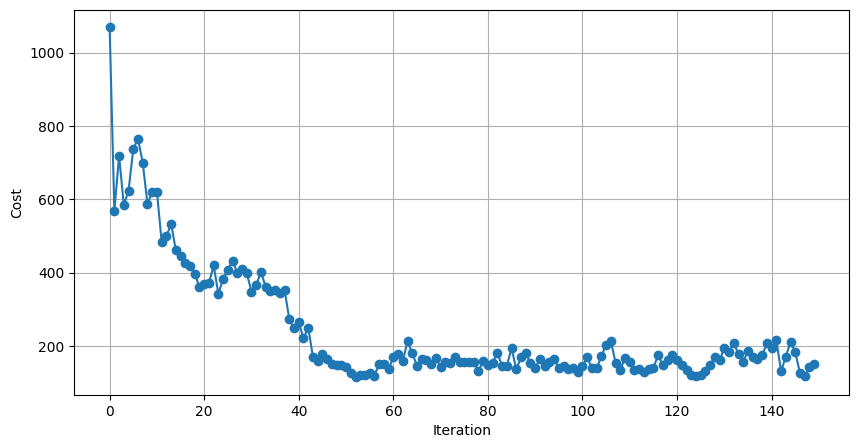

iteration_count: 149
best_params: [2.2746 6.1764 0.0579 1.9338 0.0431 0.3882 1.5915 1.9527 2.8438 3.3392 2.6345 4.3347 1.5012 4.9214]
Restricted license - for non-production use only - expires 2025-11-24
best_cost: 13.0
[1, 1, 1, 0, 0, 1]: 27 - 0.748046875
[1, 0, 1, 0, 0, 0]: 13 - 0.0302734375
[1, 1, 1, 0, 1, 1]: 427 - 0.0537109375
[1, 1, 1, 0, 0, 0]: 427 - 0.0576171875
[0, 1, 1, 0, 0, 1]: 422 - 0.015625
[0, 1, 1, 0, 1, 1]: 1622 - 0.001953125
[1, 0, 1, 0, 0, 1]: 413 - 0.025390625
[0, 1, 0, 1, 1, 1]: 830 - 0.001953125
[1, 1, 1, 0, 1, 0]: 827 - 0.0078125
[1, 1, 0, 1, 0, 1]: 835 - 0.0068359375
[1, 1, 0, 1, 0, 0]: 435 - 0.00390625
[0, 1, 0, 1, 0, 0]: 30 - 0.0078125
[0, 0, 0, 1, 0, 0]: 416 - 0.0029296875
[0, 0, 0, 1, 0, 1]: 1616 - 0.0068359375
[1, 0, 0, 1, 0, 1]: 2021 - 0.0068359375
[1, 0, 1, 0, 1, 0]: 413 - 0.0048828125
[1, 0, 0, 1, 1, 1]: 1621 - 0.0029296875
[1, 0, 0, 1, 0, 0]: 821 - 0.001953125
[0, 0, 0, 1, 1, 1]: 2016 - 0.0029296875
[0, 0, 1, 0, 0, 0]: 408 - 0.001953125
[1, 0, 1, 0, 1, 

In [1]:
should_print = True
import random
from quBLP.problemtemplate import FacilityLocationProblem as FLP
from quBLP.problemtemplate import GraphColoringProblem as GCP
from quBLP.problemtemplate import KPartitionProblem as KPP
from quBLP.models import CircuitOption, OptimizerOption
from quBLP.models import ConstrainedBinaryOptimization
from quBLP.analysis import generater
import numpy as np

random.seed(0x7ff)
np.random.seed(0x1)

optimizer_option = OptimizerOption(
    params_optimization_method='Adam',
    max_iter=150,
    opt_id='cyclic',
)
circuit_option = CircuitOption(
    num_layers=7,
    need_draw=False,
    use_decompose=True,
    mcx_mode='constant',
    circuit_type='qiskit',
    # backend='ibm_osaka',  # 'FakeQuebec' # 'AerSimulator'
    backend='AerSimulator',  # FakeKyiv, FakeTorino, FakeBrisbane
    # feedback=['depth', 'culled_depth', 'latency', 'width'],
    # feedback=['depth', 'culled_depth', 'transpile_time', 'rss_usage'],
    # IBM=True,
)
methods = ['penalty', 'cyclic', 'commute', 'HEA']
raw_depth = [[] for _ in range(len(methods))]
depth_without_one_qubit_gate = [[] for _ in range(len(methods))]
# latency = [[] for _ in range(len(methods))]
flp_problems, flp_configs = generater.generate_flp(1, [(1, 2), (2, 3), (3, 3), (3, 4)], 1, 20)
gcp_problems, gcp_configs = generater.generate_gcp(0, [(3, 1), (3, 2), (4, 2), (4, 3)])
# kpp_problems, kpp_configs = generater.generate_kpp(1, [(4, [2, 2], 3), (6, [2, 2, 2], 5), (8, [2, 2, 4], 7), (9, [3, 3, 3], 8)], 1, 20)
# kpp_problems, kpp_configs = generater.generate_kpp(1, [(4, [2, 2], 3), (6, [2, 2, 2], 5), (8, [2, 2, 4], 7), (9, [3, 3, 3], 8)], 1, 20)
kpp_problems, kpp_configs = generater.generate_kpp(0, [(4, 2, 3), (6, 3, 5), (8, 3, 7), (9, 3, 8)], 1, 20)

problems_pkg = flp_problems + gcp_problems + kpp_problems
problems = [prb for problems in problems_pkg for prb in problems]

# all_configs = [flp_configs, gcp_configs, kpp_configs]
# problem_types = ["FLP", "GCP", "KPP"]

# for problem_type, configs in zip(problem_types, all_configs):
#     print(f"{problem_type} Configurations:")
#     for config in configs:
#         print(*config)
#     print()
prb : ConstrainedBinaryOptimization = problems[0]
prb.set_algorithm_optimization_method('cyclic', 400)
# print(prb.get_best_cost())
# print(flp.get_solution_bitstr())
# exit()
print(prb.optimize(optimizer_option, circuit_option))
# print(prb.dichotomy_optimize(optimizer_option, circuit_option, num_frozen_qubit=1))

# print(kpp_configs)